# Prediction for Mchezopesa Ltd on fifa_ranking dataset

A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).

You have two possible approaches (as  shown below) given the datasets that will be provided

Input: Home team, Away team, Tournament type (World cup, Friendly, Other)

Approach 1: Polynomial approach

What to train given:

Rank of home team
Rank of away team
Tournament type
Model 1: Predict how many goals the home team scores.

Model 2: Predict how many goals the away team scores.

Approach 2: Logistic approach

Feature Engineering: Figure out from the home team’s perspective if the game is a Win, Lose or Draw (W, L, D)



In [105]:
# importing libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [4]:
# reading the datasets
df1= pd.read_csv('fifa_ranking.csv')
df2= pd.read_csv('results.csv')

In [5]:
# previewing the data
df1.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [6]:
df2.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [7]:
df1.tail()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


In [8]:
# checking the size and shape
print('The fifa ranking dataset contains ',df1.shape[0],' rows and',df1.shape[1],' columns')

The fifa ranking dataset contains  57793  rows and 16  columns


In [9]:
# checking the data types used
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57793 non-null  int64  
 1   country_full             57793 non-null  object 
 2   country_abrv             57793 non-null  object 
 3   total_points             57793 non-null  float64
 4   previous_points          57793 non-null  int64  
 5   rank_change              57793 non-null  int64  
 6   cur_year_avg             57793 non-null  float64
 7   cur_year_avg_weighted    57793 non-null  float64
 8   last_year_avg            57793 non-null  float64
 9   last_year_avg_weighted   57793 non-null  float64
 10  two_year_ago_avg         57793 non-null  float64
 11  two_year_ago_weighted    57793 non-null  float64
 12  three_year_ago_avg       57793 non-null  float64
 13  three_year_ago_weighted  57793 non-null  float64
 14  confederation         

In [10]:
# checking for null values
df1.isnull().sum()

rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64

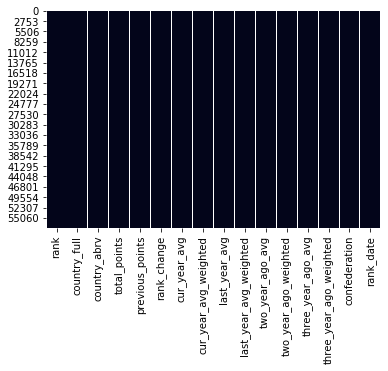

In [11]:
# Visualising the null values
sns.heatmap(df1.isnull(), cbar=False)

## the fifa_ranking dataset has no null values.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0e2eaa7490>,
      dtype=object)

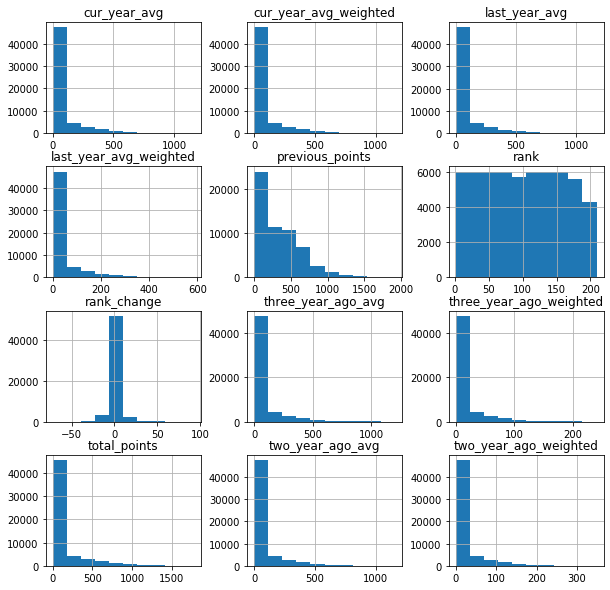

In [12]:
df1.hist(figsize=(10,10))

In [13]:
df1.describe()

,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted
count,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000
mean,101.628086,122.068637,332.302926,-0.009897,61.798602,61.798602,61.004602,30.502377,59.777462,17.933277,59.173916,11.834811
std,58.618424,260.426863,302.872948,5.804309,138.014883,138.014883,137.688204,68.844143,136.296079,40.888849,135.533343,27.106675
min,1.000000,0.000000,0.000000,-72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,0.000000,56.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,101.000000,0.000000,272.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,152.000000,92.790000,525.000000,1.000000,32.250000,32.250000,26.660000,13.330000,21.500000,6.450000,21.250000,4.250000
max,209.000000,1775.030000,1920.000000,92.000000,1158.660000,1158.660000,1169.570000,584.790000,1159.710000,347.910000,1200.770000,240.150000


In [14]:
df1

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07


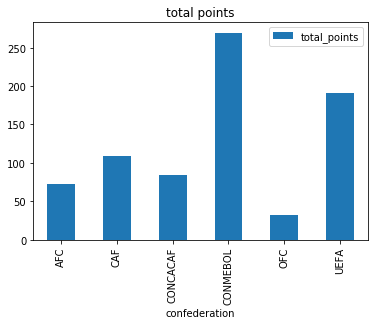

In [15]:
conf=df1.groupby(['confederation'])['total_points'].mean()
conf.plot(kind='bar', title='total points')
plt.legend()
#the confederation with the best performance in terms of total goals is CONMEBOL followed by UEFA

/home/francis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


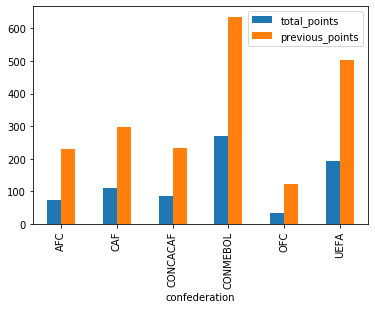

In [16]:
compare =df1.groupby(['confederation'])['total_points','previous_points'].mean()
compare.plot(kind='bar')
# On average, theprevious points are higher than the total points for all confederations
# CONMEBOL remains in the lead followed by UEFA

/home/francis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


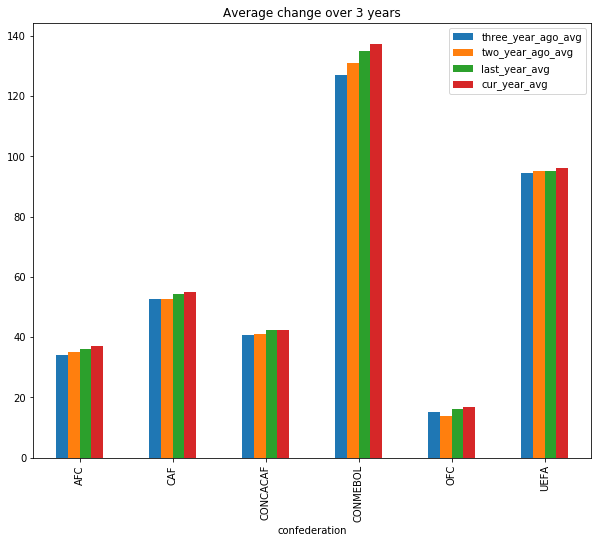

In [17]:
# checking the yearly average from three years ago upto the present time
three=df1.groupby(['confederation'])['three_year_ago_avg','two_year_ago_avg','last_year_avg','cur_year_avg'].mean()
three.plot(kind='bar', figsize=(10,8), title='Average change over 3 years')
plt.legend()
# we can see that the average over the three years has been improving for all confederations

In [18]:
#changing the rank date to date time
df1['rank_date'] = pd.to_datetime(df1['rank_date'])


In [19]:
# previewing the dataset
df1.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


[Text(0.5, 1.0, 'Trend on ranks within the confederations')]

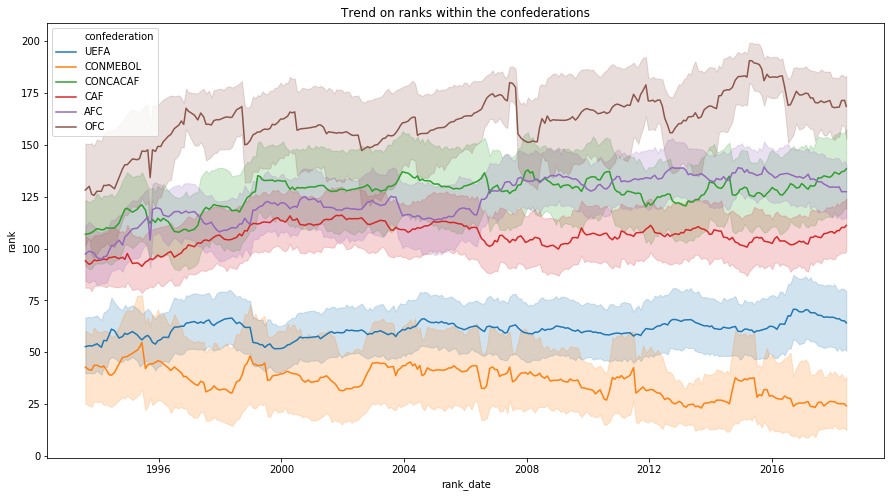

In [20]:
# Time series on the ranks
plt.figure(figsize=(15,8))
sns.lineplot(x = "rank_date", y = 'rank',hue='confederation',data=df1).set(title='Trend on ranks within the confederations')

## From the above, we can see that member countries of the confederation with the lowest rank is OFC whose ranks has been in the range 100 to 200 observed from 1996 upto 2016.
## the only confederations that have been changing positions are CONCACAF and AFC who keep crossing each other's dominat rank positions.

In [39]:
new_df=pd.merge(df1,df2,left_on='country_full', right_on='country',how='left')


In [40]:
new_df.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,...,rank_date,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,...,1993-08-08,1909-04-04,Germany,Switzerland,1.0,0.0,Friendly,Karlsruhe,Germany,False
1,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,...,1993-08-08,1910-05-16,Germany,Belgium,0.0,3.0,Friendly,Duisburg,Germany,False
2,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,...,1993-08-08,1910-10-16,Germany,Netherlands,1.0,2.0,Friendly,Kleve,Germany,False
3,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,...,1993-08-08,1911-03-26,Germany,Switzerland,6.0,2.0,Friendly,Stuttgart,Germany,False
4,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,...,1993-08-08,1911-10-09,Germany,Austria,1.0,2.0,Friendly,Dresden,Germany,False


In [24]:
#checking the data types
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        40839 non-null  object
 1   home_team   40839 non-null  object
 2   away_team   40839 non-null  object
 3   home_score  40839 non-null  int64 
 4   away_score  40839 non-null  int64 
 5   tournament  40839 non-null  object
 6   city        40839 non-null  object
 7   country     40839 non-null  object
 8   neutral     40839 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


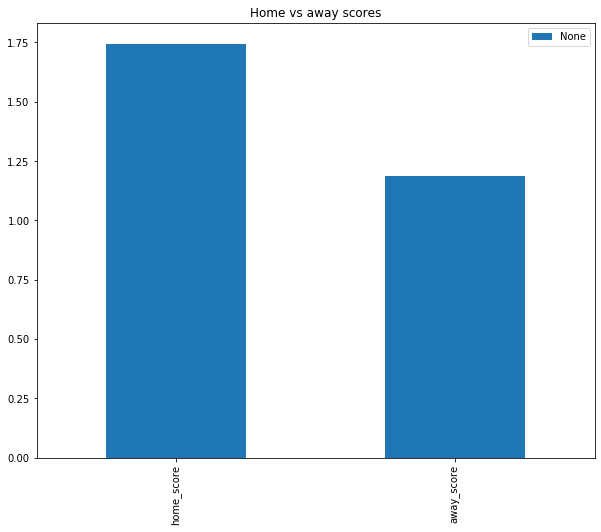

In [44]:
#checking the tournament type most played
teams=df2[['home_score','away_score']].mean()
teams.plot(kind='bar', figsize=(10,8), title='Home vs away scores')
plt.legend()
# most of the points on average were scored by home teams

/home/francis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


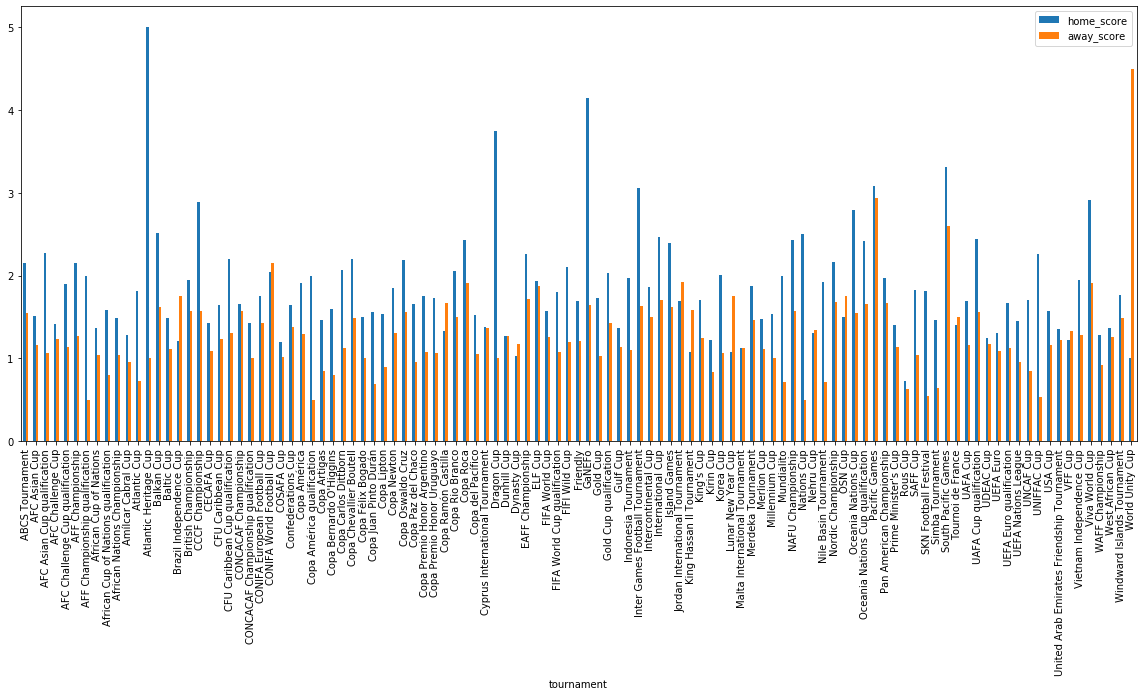

In [65]:
#df2.groupby['tournament']
torn=df2.groupby(['tournament'])['home_score','away_score'].mean()
torn.plot(kind='bar',figsize=(20,8))

## from the above figure, we can see that the team that had most home scores on average is the Atlantic heritage cup
## While the one with the highest away score on average is the World unity cup.

# Checking for Multicolinearity

In [68]:
# previowing the dataset
df1.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [69]:
print ("\nVariables : \n" ,df1.columns.tolist())


Variables : 
 ['rank', 'country_full', 'country_abrv', 'total_points', 'previous_points', 'rank_change', 'cur_year_avg', 'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted', 'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg', 'three_year_ago_weighted', 'confederation', 'rank_date']


In [70]:
#describing the dataset 
df1.describe()

,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted
count,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000
mean,101.628086,122.068637,332.302926,-0.009897,61.798602,61.798602,61.004602,30.502377,59.777462,17.933277,59.173916,11.834811
std,58.618424,260.426863,302.872948,5.804309,138.014883,138.014883,137.688204,68.844143,136.296079,40.888849,135.533343,27.106675
min,1.000000,0.000000,0.000000,-72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,0.000000,56.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,101.000000,0.000000,272.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,152.000000,92.790000,525.000000,1.000000,32.250000,32.250000,26.660000,13.330000,21.500000,6.450000,21.250000,4.250000
max,209.000000,1775.030000,1920.000000,92.000000,1158.660000,1158.660000,1169.570000,584.790000,1159.710000,347.910000,1200.770000,240.150000


In [71]:
df1.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [78]:
# checking for correlation
df1.corr()

,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted
rank,1.000000,-0.343806,-0.725829,-0.051719,-0.339931,-0.339931,-0.315359,-0.315358,-0.309038,-0.309037,-0.305259,-0.305259
total_points,-0.343806,1.000000,0.531626,0.019459,0.973089,0.973089,0.931486,0.931486,0.915520,0.915520,0.906238,0.906239
previous_points,-0.725829,0.531626,1.000000,-0.028783,0.519410,0.519410,0.495404,0.495404,0.483039,0.483038,0.476186,0.476186
rank_change,-0.051719,0.019459,-0.028783,1.000000,0.046161,0.046161,-0.015765,-0.015765,-0.004999,-0.004999,-0.000617,-0.000617
cur_year_avg,-0.339931,0.973089,0.519410,0.046161,1.000000,1.000000,0.843101,0.843102,0.846353,0.846353,0.839536,0.839536
cur_year_avg_weighted,-0.339931,0.973089,0.519410,0.046161,1.000000,1.000000,0.843101,0.843102,0.846353,0.846353,0.839536,0.839536
last_year_avg,-0.315359,0.931486,0.495404,-0.015765,0.843101,0.843101,1.000000,1.000000,0.840037,0.840037,0.849696,0.849697
last_year_avg_weighted,-0.315358,0.931486,0.495404,-0.015765,0.843102,0.843102,1.000000,1.000000,0.840037,0.840037,0.849697,0.849697
two_year_ago_avg,-0.309038,0.915520,0.483039,-0.004999,0.846353,0.846353,0.840037,0.840037,1.000000,1.000000,0.844669,0.844669
two_year_ago_weighted,-0.309037,0.915520,0.483038,-0.004999,0.846353,0.846353,0.840037,0.840037,1.000000,1.000000,0.844669,0.844669


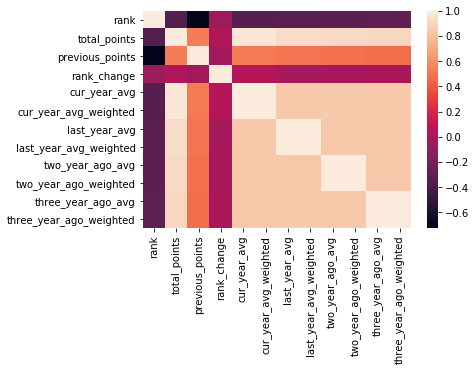

In [89]:
#plotting the correlation
sns.heatmap(df1.corr())

## from the heatmap we'll choose to work with rank,previous_points and rank_change

/home/francis/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


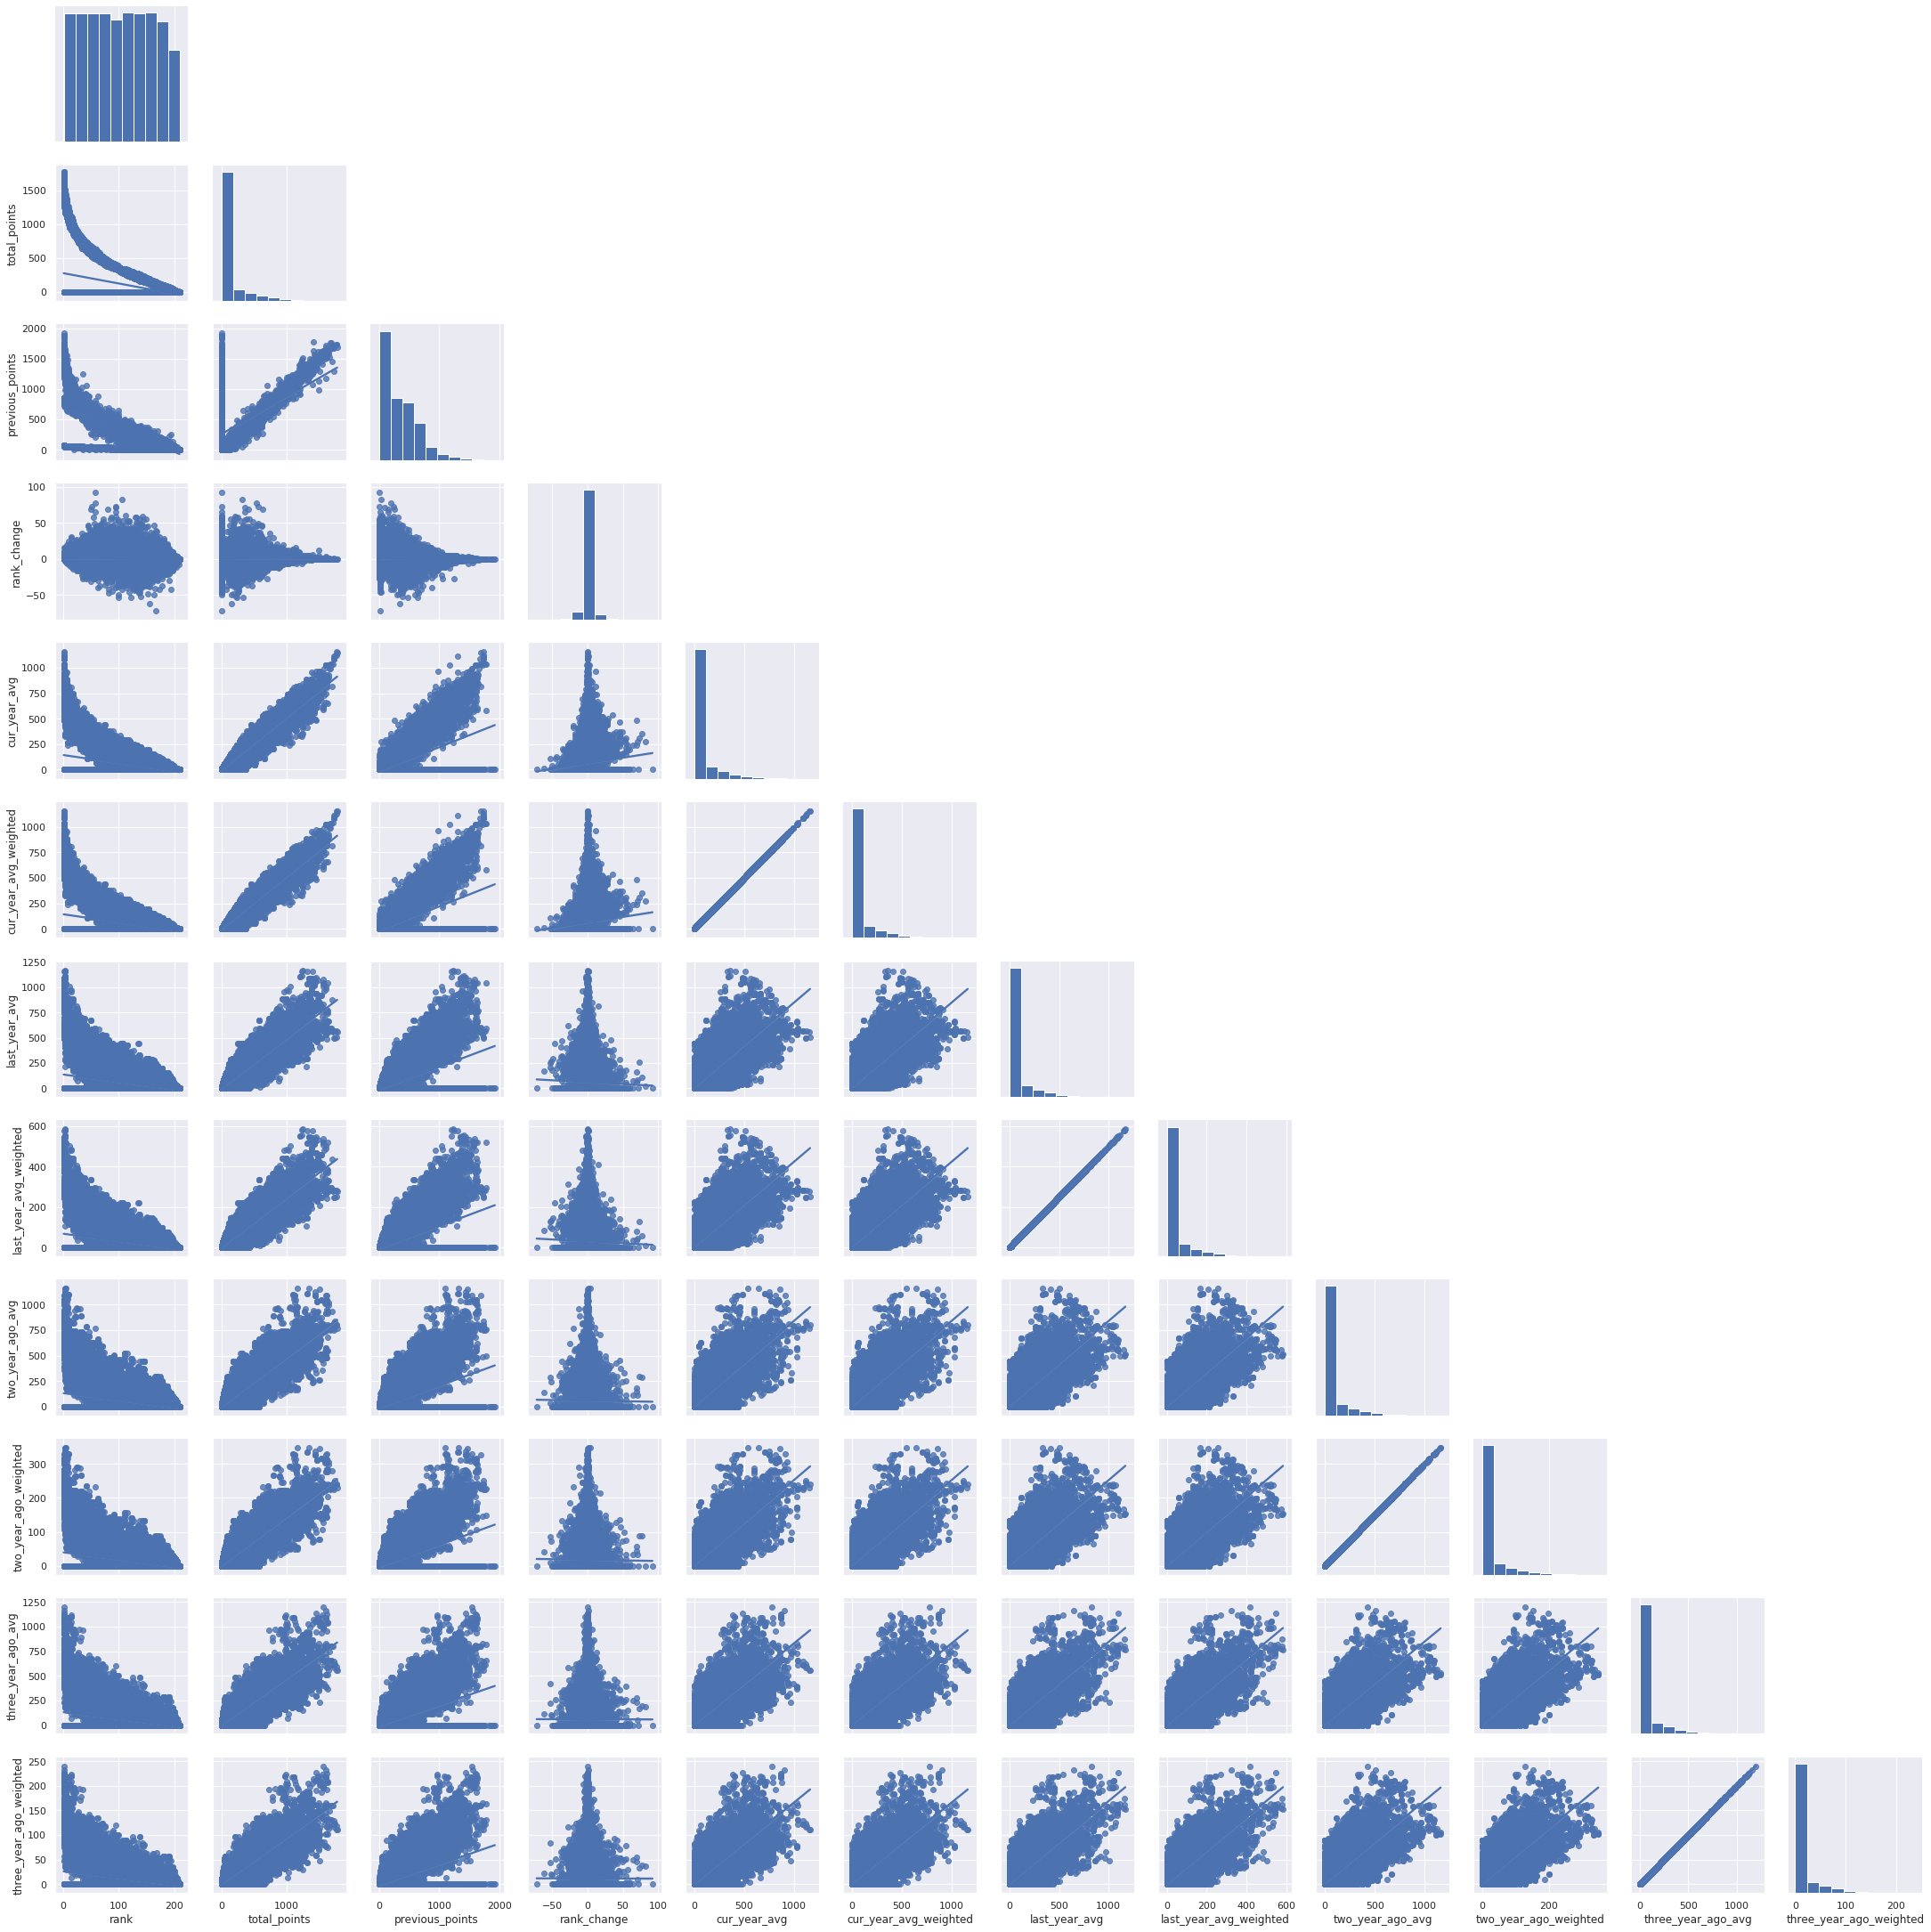

In [90]:
sns.set()
sns.pairplot(df1,size = 2.5, kind = "reg",corner=True)

In [111]:
#assigning columns to be used
X = df1[['previous_points']].values
y = df1['rank'].values

In [112]:
#
import statsmodels.api as sm
model=sm.OLS(y,X)
result=model.fit()
print(result.summary2())

                         Results: Ordinary least squares
Model:                  OLS              Adj. R-squared (uncentered): 0.157      
Dependent Variable:     y                AIC:                         704915.2524
Date:                   2021-10-09 17:51 BIC:                         704924.2170
No. Observations:       57793            Log-Likelihood:              -3.5246e+05
Df Model:               1                F-statistic:                 1.074e+04  
Df Residuals:           57792            Prob (F-statistic):          0.00       
R-squared (uncentered): 0.157            Scale:                       11607.     
---------------------------------------------------------------------------------------
            Coef.        Std.Err.          t           P>|t|        [0.025       0.975]
---------------------------------------------------------------------------------------
x1          0.1033         0.0010       103.6518       0.0000       0.1014       0.1053
-----------------

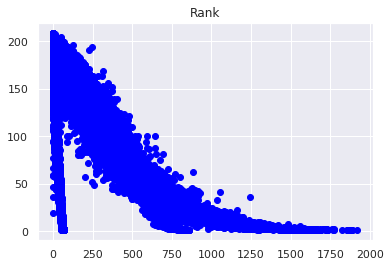

In [113]:
plt.scatter(X,y,color='blue')
plt.title('Rank')
plt.xlabel('')
plt.ylabel('')
plt.show()

In [135]:
#splitting train and test data
X_train, Y_train, X_test, Y_test = train_test_split(X,y, test_size = 0.2, random_state=0)
reg_line = LinearRegression()
reg_line.fit(X,y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

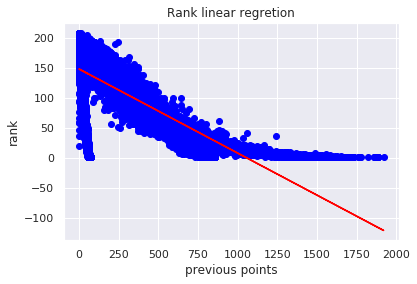

In [120]:
# plotting the Linear Regression results
plt.scatter(X, y, color='blue')
plt.plot(X, reg_line.predict(X), color='red')
plt.title('Rank linear regretion')
plt.xlabel('previous points')
plt.ylabel('rank')
plt.show()

#from the plot below we can see that the more the points the higher the rank of the team.

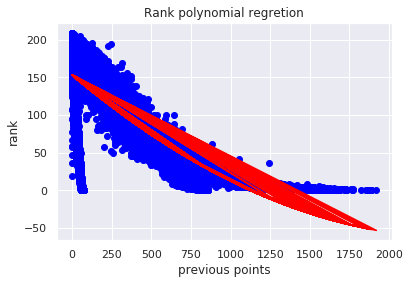

In [130]:
# Fit polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree = 2) 
X_poly = poly_reg.fit_transform(X)


pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)
#plotting the Polynomial Regression results
plt.scatter(X, y, color='blue') 
plt.plot(X, pol_reg.predict(X_poly), color='red')
plt.title('Rank polynomial regretion')
plt.xlabel('previous points')
plt.ylabel('rank')
plt.show()

In [133]:
# Predict using linear regression
lin_pred = reg_line.predict([[6.5]])
print('Linear prediction: %d' %lin_pred)

# Predict using Polynomial Regression
poly_pred = pol_reg.predict(poly_reg.fit_transform([[6.5]]))
print('Polynomial prediction: %d' %poly_pred)

Linear prediction: 147
Polynomial prediction: 151


In [134]:
#using the polynomial regressor will lead to more accurate results in prediction.